In [1]:
using QuantumOptics
using PyPlot
using JCH_Simulation  # <--- Import your new package!

# 1. Parameters 
N_sites = 2      # System Size (Cavity A and B)
dim_fock = 3     # Number of Fock states (0,1,2)
ω = 1.0
g = 0.05
J = 0.05

# 2. USE THE PACKAGE (Builds H and Basis automatically)
# This replaces 20+ lines of manual basis setup
H_total, b_total = build_jch_hamiltonian(N_sites, ω, J, g, dim_fock)

# 3. Define Observables for Plotting
# We need to extract the bases to measure P_A (Atom) and n_A (Cavity)
b_site = b_total.bases[1] 
b_cav  = b_site.bases[1]
b_atom = b_site.bases[2]

# Site 1 (Atom A / Cavity A) Operators
a1  = embed(b_total, 1, destroy(b_cav) ⊗ one(b_atom))
sz1 = embed(b_total, 1, one(b_cav) ⊗ sigmaz(b_atom))

# Site 2 (Atom B / Cavity B) Operators
a2  = embed(b_total, 2, destroy(b_cav) ⊗ one(b_atom))
sz2 = embed(b_total, 2, one(b_cav) ⊗ sigmaz(b_atom))

# 4. Initial State
# Atom A = Excited, Cavity A = 0
# Atom B = Ground, Cavity B = 0
psi_site1 = fockstate(b_cav, 0) ⊗ spinup(b_atom)
psi_site2 = fockstate(b_cav, 0) ⊗ spindown(b_atom)
psi0 = psi_site1 ⊗ psi_site2

# 5. Time Evolution 
T = [0:0.5:100;]
tout, psi_t = timeevolution.schroedinger(T, psi0, H_total)

# 6. Expectation Values & Plotting (Same as before)
P_exc_A_op = (sz1 + one(sz1)) / 2
P_exc_B_op = (sz2 + one(sz2)) / 2
n_A_op = a1' * a1
n_B_op = a2' * a2

P_A = real(expect(P_exc_A_op, psi_t))
P_B = real(expect(P_exc_B_op, psi_t))
n_A = real(expect(n_A_op, psi_t))
n_B = real(expect(n_B_op, psi_t))

# Plotting
figure(figsize=(10, 6))
plot(tout, P_A, label="Atom A (Start)", color="red", linewidth=2)
plot(tout, P_B, label="Atom B (Target)", color="blue", linewidth=2)
plot(tout, n_A, label="Cavity A Photons", color="pink", linestyle="--", alpha=0.5)
plot(tout, n_B, label="Cavity B Photons", color="cyan", linestyle="--", alpha=0.5)
xlabel("Time"); ylabel("Probability"); title("Quantum State Transfer (Using JCH_Simulation Package)")
legend(); grid(true)

[ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee] 
[ Info: Precompiling SciMLBasePyCallExt [d083c4ab-32a5-5342-b289-e118b48fb79d] (cache misses: wrong dep version loaded (2))
[ Info: Precompiling JCH_Simulation [53005086-5384-4861-a53a-096895311029] 

SYSTEM: caught exception of type :MethodError while trying to print a failed Task notice; giving up


LoadError: MethodError: no method matching mul!(::Ket{CompositeBasis{Vector{Int64}, Tuple{FockBasis{Int64}, SpinBasis{1//2, Int64}, FockBasis{Int64}, SpinBasis{1//2, Int64}}}, Vector{ComplexF64}}, ::Operator{CompositeBasis{Vector{Int64}, Tuple{CompositeBasis{Vector{Int64}, Tuple{FockBasis{Int64}, SpinBasis{1//2, Int64}}}, CompositeBasis{Vector{Int64}, Tuple{FockBasis{Int64}, SpinBasis{1//2, Int64}}}}}, CompositeBasis{Vector{Int64}, Tuple{CompositeBasis{Vector{Int64}, Tuple{FockBasis{Int64}, SpinBasis{1//2, Int64}}}, CompositeBasis{Vector{Int64}, Tuple{FockBasis{Int64}, SpinBasis{1//2, Int64}}}}}, Matrix{ComplexF64}}, ::Ket{CompositeBasis{Vector{Int64}, Tuple{FockBasis{Int64}, SpinBasis{1//2, Int64}, FockBasis{Int64}, SpinBasis{1//2, Int64}}}, Vector{ComplexF64}}, ::ComplexF64, ::ComplexF64)
The function `mul!` exists, but no method is defined for this combination of argument types.

[0mClosest candidates are:
[0m  mul!([91m::ChainRulesCore.AbstractThunk[39m, ::Any, ::Any, ::Any, ::Any)
[0m[90m   @[39m [32mChainRulesCore[39m [90mC:\Users\Vedant\.julia\packages\ChainRulesCore\Vsbj9\src\tangent_types\[39m[90m[4mthunks.jl:103[24m[39m
[0m  mul!(::Ket{B1}, [91m::LazySum{B1, B2}[39m, ::Ket{B2}, ::Any, ::Any) where {B1, B2}
[0m[90m   @[39m [32mQuantumOpticsBase[39m [90mC:\Users\Vedant\.julia\packages\QuantumOpticsBase\u7a0b\src\[39m[90m[4moperators_lazysum.jl:189[24m[39m
[0m  mul!(::Ket{B1}, [91m::LazyTensor{B1, B2, F, I, T}[39m, ::Ket{B2}, ::Any, ::Any) where {B1<:Basis, B2<:Basis, F, I, T<:Tuple{Vararg{DataOperator}}}
[0m[90m   @[39m [32mQuantumOpticsBase[39m [90mC:\Users\Vedant\.julia\packages\QuantumOpticsBase\u7a0b\src\[39m[90m[4moperators_lazytensor.jl:539[24m[39m
[0m  ...


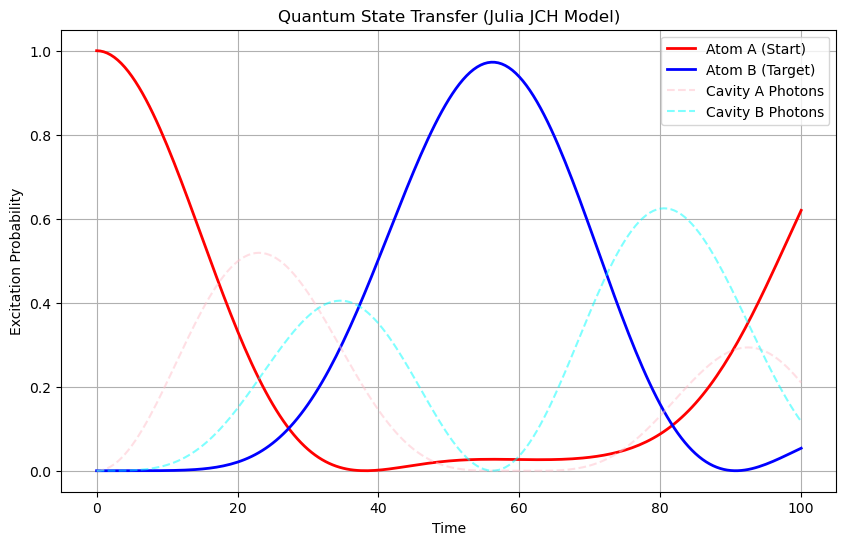

In [2]:
using QuantumOptics
using PyPlot

# 1. Parameters 
N = 3
ω = 1.0
g = 0.05
J = 0.05

# 2. Define Bases 
b_cav = FockBasis(N)
b_atom = SpinBasis(1//2)


b_site = b_cav ⊗ b_atom

# Order: [Cavity A, Atom A, Cavity B, Atom B]
b_total = b_site ⊗ b_site

# 3. Define Operators
a_local = destroy(b_cav) ⊗ one(b_atom)
sm_local = one(b_cav) ⊗ sigmam(b_atom)
sz_local = one(b_cav) ⊗ sigmaz(b_atom)

# Expand to Full System

a1  = a_local ⊗ one(b_site)
sm1 = sm_local ⊗ one(b_site)
sz1 = sz_local ⊗ one(b_site)

a2  = one(b_site) ⊗ a_local
sm2 = one(b_site) ⊗ sm_local
sz2 = one(b_site) ⊗ sz_local

# 4. Hamiltonian Construction
H_site1 = ω*a1'*a1 + 0.5*ω*sz1 + g*(a1'*sm1 + a1*sm1')
H_site2 = ω*a2'*a2 + 0.5*ω*sz2 + g*(a2'*sm2 + a2*sm2')

# Hopping Interaction
H_hop = -J * (a1'*a2 + a1*a2')

H_total = H_site1 + H_site2 + H_hop

# 5. Initial State
# Atom A = Excited (spinup), Cavity A = 0
# Atom B = Ground (spindown), Cavity B = 0
psi_site1 = fockstate(b_cav, 0) ⊗ spinup(b_atom)
psi_site2 = fockstate(b_cav, 0) ⊗ spindown(b_atom)

psi0 = psi_site1 ⊗ psi_site2

# 6. Time Evolution 
T = [0:0.5:100;]
tout, psi_t = timeevolution.schroedinger(T, psi0, H_total)

# 7. Expectation Values
P_exc_A_op = (sz1 + one(sz1)) / 2
P_exc_B_op = (sz2 + one(sz2)) / 2
n_A_op = a1' * a1
n_B_op = a2' * a2

P_A = real(expect(P_exc_A_op, psi_t))
P_B = real(expect(P_exc_B_op, psi_t))
n_A = real(expect(n_A_op, psi_t))
n_B = real(expect(n_B_op, psi_t))

# 8. Plotting
figure(figsize=(10, 6))

plot(tout, P_A, label="Atom A (Start)", color="red", linewidth=2)
plot(tout, P_B, label="Atom B (Target)", color="blue", linewidth=2)
plot(tout, n_A, label="Cavity A Photons", color="pink", linestyle="--", alpha=0.5)
plot(tout, n_B, label="Cavity B Photons", color="cyan", linestyle="--", alpha=0.5)

xlabel("Time")
ylabel("Excitation Probability")
title("Quantum State Transfer (Julia JCH Model)")
legend()
grid(true)



In [4]:
# TIMING THE SIMULATION
print("Starting QuTiP simulation...")

@time tout, psi_t = timeevolution.schroedinger(T, psi0, H_total);

Starting QuTiP simulation...  0.001149 seconds (746 allocations: 287.389 KiB)


In [4]:
import Pkg

In [5]:
Pkg.add("BenchmarkTools")

    Updating registry at `C:\Users\Vedant\.julia\registries\General.toml`
   Resolving package versions...
     Project No packages added to or removed from `C:\Users\Vedant\.julia\environments\v1.12\Project.toml`
    Manifest No packages added to or removed from `C:\Users\Vedant\.julia\environments\v1.12\Manifest.toml`


In [5]:
import BenchmarkTools as BT

In [7]:
BT.@benchmark tout, psi_t = timeevolution.schroedinger(T, psi0, H_total)

BenchmarkTools.Trial: 10000 samples with 1 evaluation per sample.
 Range (min … max):  190.500 μs …  42.873 ms  ┊ GC (min … max):  0.00% … 98.61%
 Time  (median):     276.950 μs               ┊ GC (median):     0.00%
 Time  (mean ± σ):   342.293 μs ± 750.589 μs  ┊ GC (mean ± σ):  10.97% ±  7.87%

  ██▅                                                            
  ███▇▅▄▄▅▆▇█▇▆▅▄▄▄▃▃▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▂▂▂▂▂▂▂▂▂ ▃
  190 μs           Histogram: frequency by time          987 μs <

 Memory estimate: 285.22 KiB, allocs estimate: 700.

In [1]:
using QuantumOptics
using PyPlot

function benchmark_jch_julia(N_values)
    times = Float64[]
    
    # Physics Parameters
    ω = 1.0
    g = 0.05
    J = 0.05
    T = [0:0.25:50;] 
    
    println("--- Starting Julia Benchmark ---")
    
    # --- FIXED WARM-UP PHASE ---
    print("Warming up JIT compiler... ")
    
    # 1. Define component bases separately
    b_cav_w = FockBasis(2)
    b_atom_w = SpinBasis(1//2)
    b_site_w = b_cav_w ⊗ b_atom_w
    
    # 2. Build Operators correctly (Component by Component)
    a_local_w = destroy(b_cav_w) ⊗ one(b_atom_w)
    a_w = a_local_w ⊗ one(b_site_w) # Expand to 2 sites
    
    # 3. Build Dummy Hamiltonian & State
    H_warm = a_w' * a_w
    psi_site_w = fockstate(b_cav_w, 0) ⊗ spinup(b_atom_w)
    psi_warm = psi_site_w ⊗ psi_site_w
    
    # 4. Run Dummy Simulation
    timeevolution.schroedinger([0.0, 0.1], psi_warm, H_warm)
    println("Done.")
    
    # --- REAL BENCHMARK LOOP ---
    for N in N_values
        # 1. Build System for specific N
        b_cav = FockBasis(N)
        b_atom = SpinBasis(1//2)
        b_site = b_cav ⊗ b_atom
        
        # Operators
        a_local = destroy(b_cav) ⊗ one(b_atom)
        sm_local = one(b_cav) ⊗ sigmam(b_atom)
        sz_local = one(b_cav) ⊗ sigmaz(b_atom)
        
        # Expand to 2-Site System
        a1 = a_local ⊗ one(b_site)
        sm1 = sm_local ⊗ one(b_site)
        sz1 = sz_local ⊗ one(b_site)
        
        a2 = one(b_site) ⊗ a_local
        sm2 = one(b_site) ⊗ sm_local
        sz2 = one(b_site) ⊗ sz_local
        
        # Hamiltonian
        H = ω*a1'*a1 + 0.5*ω*sz1 + g*(a1'*sm1 + a1*sm1') +
            ω*a2'*a2 + 0.5*ω*sz2 + g*(a2'*sm2 + a2*sm2') -
            J*(a1'*a2 + a1*a2')
            
        # Initial State
        psi0 = (fockstate(b_cav, 0) ⊗ spinup(b_atom)) ⊗ (fockstate(b_cav, 0) ⊗ spindown(b_atom))
        
        # 2. Measure Time
        dt = @elapsed timeevolution.schroedinger(T, psi0, H)
        
        push!(times, dt)
        println("N=$N: $dt seconds")
    end
    
    return times
end




benchmark_jch_julia (generic function with 1 method)

--- Starting Julia Benchmark ---
Warming up JIT compiler... Done.
N=3: 0.0002325 seconds
N=5: 0.0002602 seconds
N=8: 0.0004346 seconds
N=10: 0.0007712 seconds
N=12: 0.0008581 seconds
N=15: 0.0012259 seconds
N=18: 0.0013819 seconds
N=20: 0.0018227 seconds
Julia Times: [0.0002325, 0.0002602, 0.0004346, 0.0007712, 0.0008581, 0.0012259, 0.0013819, 0.0018227]


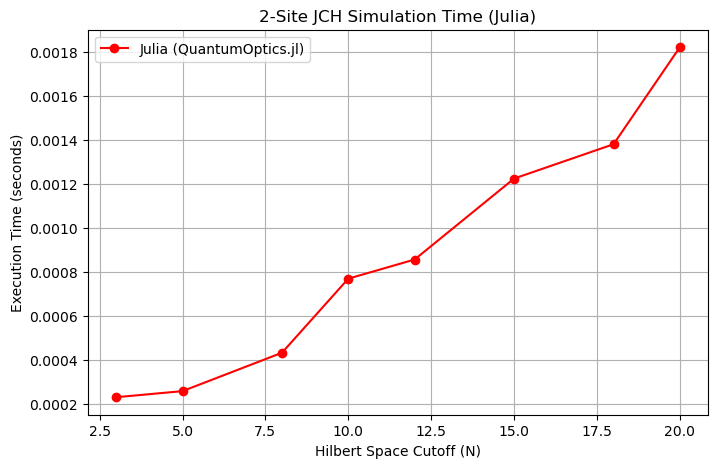

In [11]:
N_list =  [3, 5, 8, 10, 12, 15, 18, 20]
julia_times = benchmark_jch_julia(N_list)
println("Julia Times: ", julia_times)

# --- PLOTTING ---
figure(figsize=(8, 5))
plot(N_list, julia_times, "o-", color="red", label="Julia (QuantumOptics.jl)")
xlabel("Hilbert Space Cutoff (N)")
ylabel("Execution Time (seconds)")
title("2-Site JCH Simulation Time (Julia)")
legend()
grid(true)